In [210]:
import matplotlib.pyplot as plt
#plt.style.use('seaborn')
import matplotlib.patches as patches
import warnings
warnings.filterwarnings('ignore')
import netCDF4 as nc
import cmocean as cm
import numpy as np
from salishsea_tools import (
    viz_tools,
)
import sys
sys.path.append('/data/tjarniko/mocsy')
import mocsy

sys.path.append('/data/tjarniko/mocsy')
import arrow
sys.path.append('/data/tjarniko/MEOPAR/analysis-tereza/notebooks/carbon_dev/BASE_RUN/CLEAN/CCCma_src')
import mocsy
import CCCma
import CCCma_stations as cs
import CCCma_fwk as Cfwk
from matplotlib import reload
import arrow
import glob

%matplotlib inline

# This code plots DIC, TA, temp, sal depth profiles for the output of the BR and PI runs for any 3 months at any of 12 defined stations, as well as differences in these values by month.

In [211]:
### Definition of station code and month numbers
stn = ['BS', 'CS', 'FP', 'FR','HS', 'JDFB', 'JDFC', 'JS', 'NS', 'PS', 'SE', 'TI']
stn_depths = np.zeros(12)

for i in range(0,len(stn)):
    tstn = stn[i]
    ncname = './pibr/' + tstn + '_stored_PI_BR_output.nc'
    w = nc.Dataset(ncname)
    mon_DIC_BR_mean  = w['ncoutput']['mon_DIC_BR_mean'][0,:]
    w = np.where(np.isnan(mon_DIC_BR_mean))
    firstnan = w[0][0]
    lastval = firstnan-1
    stn_depth = prof_depth[lastval]
    stn_depths[i] = stn_depth
    
    w2 = stn.index(tstn)
    tdepth = stn_depths[w2]
    #print('Depth of stn ' + tstn + ' is '+ str(tdepth))

## Define station and month to plot

In [212]:
#stn = ['BS', 'CS', 'FP', 'FR','HS', 'JDFB', 'JDFC', 'JS', 'NS', 'PS', 'SE', 'TI']

tstn = 'TI'
w2 = stn.index(tstn)
tdepth = stn_depths[w2]
print('Depth of stn ' + tstn + ' is '+ str(tdepth))
mon1 = 1
mon2 = 3
mon3 = 7
print('We are plotting months '+str(mon1)+', '+str(mon2)+', '+str(mon3))
ymax = tdepth

Depth of stn TI is 414.5340881347656
We are plotting months 1, 3, 7


In [213]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [214]:
w2 = nc.Dataset('/data/tjarniko/results/BASERUN_EXP/PI_3rd_2015/ncs/SKOG_1d_20151227_20151231_ptrc_T_20151230-20151230.nc')
prof_depth = w2.variables['deptht'][:]

## DIC plot 

DIC_plots_stn_TI_MON_1-3-7.png


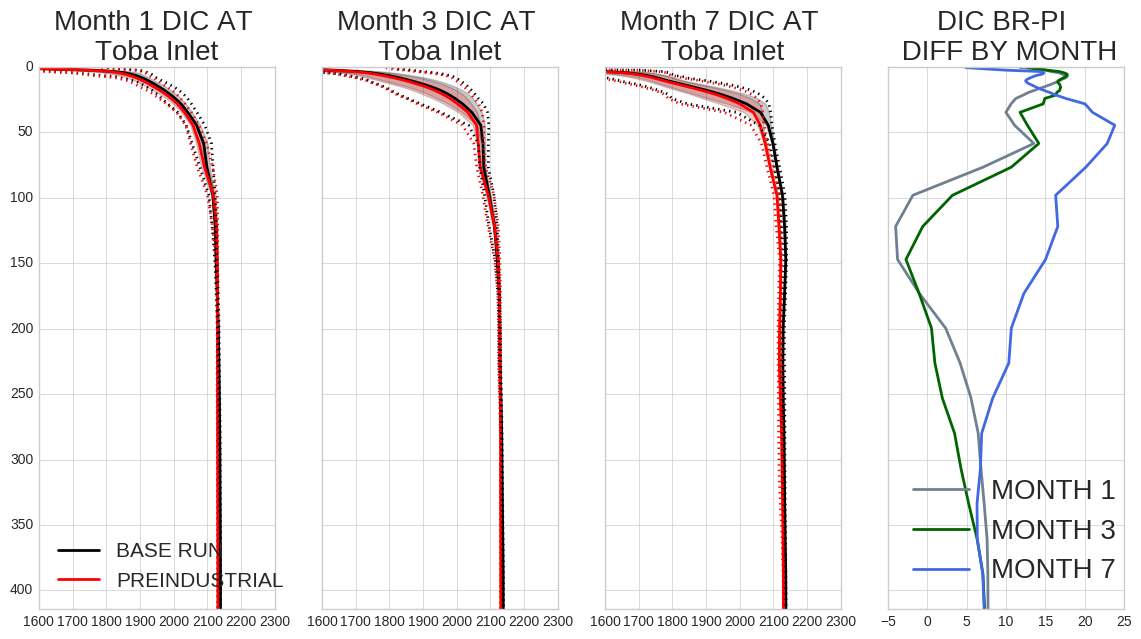

In [215]:
fname = 'DIC_plots_stn_' + tstn + '_MON_' + str(mon1) + '-' + str(mon2) + '-' + str(mon3) +'.png'
xmin = 1600
xmax = 2300
ymin = 0
print(fname)

ncname = './pibr/' + tstn + '_stored_PI_BR_output.nc'
w = nc.Dataset(ncname)
mon_DIC_BR_mean  = w['ncoutput']['mon_DIC_BR_mean']
mon_DIC_BR_std = w['ncoutput']['mon_DIC_BR_std']
mon_DIC_BR_min  = w['ncoutput']['mon_DIC_BR_min']
mon_DIC_BR_max  = w['ncoutput']['mon_DIC_BR_max']
mon_DIC_PI_mean = w['ncoutput']['mon_DIC_PI_mean']
mon_DIC_PI_std  = w['ncoutput']['mon_DIC_PI_std']
mon_DIC_PI_min  = w['ncoutput']['mon_DIC_PI_min']
mon_DIC_PI_max  = w['ncoutput']['mon_DIC_PI_max']

fig, (ax, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(14, 7), sharey=True)

ax.invert_yaxis()
ax.plot(mon_DIC_BR_mean[mon1-1],prof_depth,linewidth = 2, linestyle='-',color = 'k', label = 'BASE RUN') 
ax.fill_betweenx(prof_depth,mon_DIC_BR_mean[mon1-1]-mon_DIC_BR_std[mon1-1],mon_DIC_BR_mean[mon1-1]+mon_DIC_BR_std[mon1-1],facecolor='k', alpha = 0.2) 
ax.plot(mon_DIC_PI_mean[mon1-1],prof_depth,linewidth = 2, linestyle='-',color = 'r', label = 'PREINDUSTRIAL') 
ax.fill_betweenx(prof_depth,mon_DIC_PI_mean[mon1-1]-mon_DIC_PI_std[mon1-1],mon_DIC_PI_mean[mon1-1]+mon_DIC_PI_std[mon1-1],facecolor='r', alpha = 0.2) 
ax.plot(mon_DIC_BR_max[mon1-1],prof_depth,linewidth = 2, linestyle = ':',color = 'k')
ax.plot(mon_DIC_BR_min[mon1-1],prof_depth,linewidth = 2, linestyle = ':',color = 'k')
ax.plot(mon_DIC_PI_min[mon1-1],prof_depth,linewidth = 2, linestyle = ':',color = 'r')
ax.plot(mon_DIC_PI_max[mon1-1],prof_depth,linewidth = 2, linestyle = ':',color = 'r')
ax.set_xlim([xmin,xmax])
ax.set_ylim([ymax,ymin])
ax.set_title('Month ' + str(mon1) + ' DIC AT \n'+cs.STATIONS[tstn]['fullname'], fontsize = 20)
ax.legend(fontsize = 15, loc = 'best')
mon1diff = mon_DIC_BR_mean[mon1-1] - mon_DIC_PI_mean[mon1-1]

ax2.plot(mon_DIC_BR_mean[mon2-1],prof_depth,linewidth = 2, linestyle='-',color = 'k', label = 'BASE RUN') 
ax2.fill_betweenx(prof_depth,mon_DIC_BR_mean[mon2-1]-mon_DIC_BR_std[mon2-1],mon_DIC_BR_mean[mon2-1]+mon_DIC_BR_std[mon2-1],facecolor='k', alpha = 0.2) 
ax2.plot(mon_DIC_PI_mean[mon2-1],prof_depth,linewidth = 2, linestyle='-',color = 'r', label = 'PREINDUSTRIAL') 
ax2.fill_betweenx(prof_depth,mon_DIC_PI_mean[mon2-1]-mon_DIC_PI_std[mon2-1],mon_DIC_PI_mean[mon2-1]+mon_DIC_PI_std[mon2-1],facecolor='r', alpha = 0.2) 
ax2.plot(mon_DIC_BR_max[mon2-1],prof_depth,linewidth = 2, linestyle = ':',color = 'k')
ax2.plot(mon_DIC_BR_min[mon2-1],prof_depth,linewidth = 2, linestyle = ':',color = 'k')
ax2.plot(mon_DIC_PI_min[mon2-1],prof_depth,linewidth = 2, linestyle = ':',color = 'r')
ax2.plot(mon_DIC_PI_max[mon2-1],prof_depth,linewidth = 2, linestyle = ':',color = 'r')
ax2.set_xlim([xmin,xmax])
ax2.set_ylim([ymax,ymin])
ax2.set_title('Month ' + str(mon2) + ' DIC AT \n'+cs.STATIONS[tstn]['fullname'], fontsize = 20)

mon2diff = mon_DIC_BR_mean[mon2-1] - mon_DIC_PI_mean[mon2-1]

ax3.plot(mon_DIC_BR_mean[mon3-1],prof_depth,linewidth = 2, linestyle='-',color = 'k', label = 'BASE RUN') 
ax3.fill_betweenx(prof_depth,mon_DIC_BR_mean[mon3-1]-mon_DIC_BR_std[mon3-1],mon_DIC_BR_mean[mon3-1]+mon_DIC_BR_std[mon3-1],facecolor='k', alpha = 0.2) 
ax3.plot(mon_DIC_PI_mean[mon3-1],prof_depth,linewidth = 2, linestyle='-',color = 'r', label = 'PREINDUSTRIAL') 
ax3.fill_betweenx(prof_depth,mon_DIC_PI_mean[mon3-1]-mon_DIC_PI_std[mon3-1],mon_DIC_PI_mean[mon3-1]+mon_DIC_PI_std[mon3-1],facecolor='r', alpha = 0.2) 
ax3.plot(mon_DIC_BR_max[mon3-1],prof_depth,linewidth = 2, linestyle = ':',color = 'k')
ax3.plot(mon_DIC_BR_min[mon3-1],prof_depth,linewidth = 2, linestyle = ':',color = 'k')
ax3.plot(mon_DIC_PI_min[mon3-1],prof_depth,linewidth = 2, linestyle = ':',color = 'r')
ax3.plot(mon_DIC_PI_max[mon3-1],prof_depth,linewidth = 2, linestyle = ':',color = 'r')
ax3.set_xlim([xmin,xmax])
ax3.set_ylim([ymax,ymin])
ax3.set_title('Month ' + str(mon3) + ' DIC AT \n'+cs.STATIONS[tstn]['fullname'], fontsize = 20)

mon3diff = mon_DIC_BR_mean[mon3-1] - mon_DIC_PI_mean[mon3-1]

ax4.plot(mon1diff,prof_depth,linewidth = 2, linestyle='-',color = 'slategrey',label = 'MONTH ' + str(mon1)) 
ax4.plot(mon2diff,prof_depth,linewidth = 2, linestyle='-',color = 'darkgreen',label = 'MONTH ' + str(mon2))
ax4.plot(mon3diff,prof_depth,linewidth = 2, linestyle='-',color = 'royalblue',label = 'MONTH ' + str(mon3))
ax4.legend(fontsize =20, loc = 'best')
ax4.set_title('DIC BR-PI \n DIFF BY MONTH' , fontsize = 20)

fig.savefig(fname)

## TA plot

TA_plots_stn_TI_MON_1-3-7.png


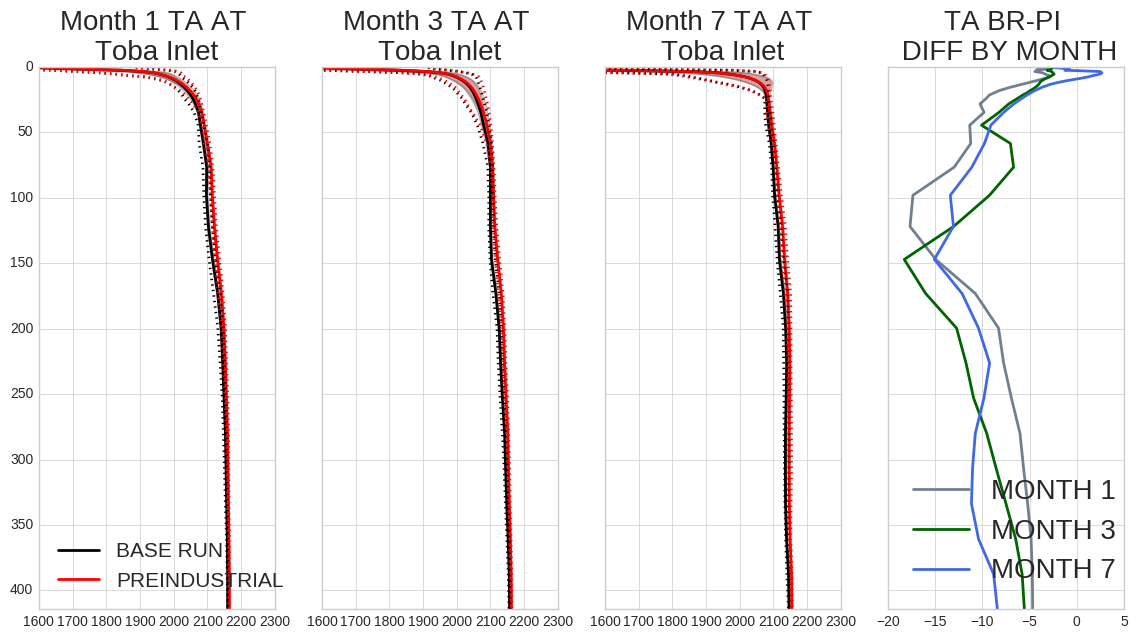

In [216]:
fname = 'TA_plots_stn_' + tstn + '_MON_' + str(mon1) + '-' + str(mon2) + '-' + str(mon3) +'.png'
xmin = 1600
xmax = 2300
ymin = 0
print(fname)

ncname = './pibr/' + tstn + '_stored_PI_BR_output.nc'
w = nc.Dataset(ncname)
mon_TA_BR_mean  = w['ncoutput']['mon_TA_BR_mean']
mon_TA_BR_std = w['ncoutput']['mon_TA_BR_std']
mon_TA_BR_min  = w['ncoutput']['mon_TA_BR_min']
mon_TA_BR_max  = w['ncoutput']['mon_TA_BR_max']
mon_TA_PI_mean = w['ncoutput']['mon_TA_PI_mean']
mon_TA_PI_std  = w['ncoutput']['mon_TA_PI_std']
mon_TA_PI_min  = w['ncoutput']['mon_TA_PI_min']
mon_TA_PI_max  = w['ncoutput']['mon_TA_PI_max']

fig, (ax, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(14, 7), sharey=True)

ax.invert_yaxis()
ax.plot(mon_TA_BR_mean[mon1-1],prof_depth,linewidth = 2, linestyle='-',color = 'k', label = 'BASE RUN') 
ax.fill_betweenx(prof_depth,mon_TA_BR_mean[mon1-1]-mon_TA_BR_std[mon1-1],mon_TA_BR_mean[mon1-1]+mon_TA_BR_std[mon1-1],facecolor='k', alpha = 0.2) 
ax.plot(mon_TA_PI_mean[mon1-1],prof_depth,linewidth = 2, linestyle='-',color = 'r', label = 'PREINDUSTRIAL') 
ax.fill_betweenx(prof_depth,mon_TA_PI_mean[mon1-1]-mon_TA_PI_std[mon1-1],mon_TA_PI_mean[mon1-1]+mon_TA_PI_std[mon1-1],facecolor='r', alpha = 0.2) 
ax.plot(mon_TA_BR_max[mon1-1],prof_depth,linewidth = 2, linestyle = ':',color = 'k')
ax.plot(mon_TA_BR_min[mon1-1],prof_depth,linewidth = 2, linestyle = ':',color = 'k')
ax.plot(mon_TA_PI_min[mon1-1],prof_depth,linewidth = 2, linestyle = ':',color = 'r')
ax.plot(mon_TA_PI_max[mon1-1],prof_depth,linewidth = 2, linestyle = ':',color = 'r')
ax.set_xlim([xmin,xmax])
ax.set_ylim([ymax,ymin])
ax.set_title('Month ' + str(mon1) + ' TA AT \n'+cs.STATIONS[tstn]['fullname'], fontsize = 20)
ax.legend(fontsize = 15, loc = 'best')
mon1diff = mon_TA_BR_mean[mon1-1] - mon_TA_PI_mean[mon1-1]

ax2.plot(mon_TA_BR_mean[mon2-1],prof_depth,linewidth = 2, linestyle='-',color = 'k', label = 'BASE RUN') 
ax2.fill_betweenx(prof_depth,mon_TA_BR_mean[mon2-1]-mon_TA_BR_std[mon2-1],mon_TA_BR_mean[mon2-1]+mon_TA_BR_std[mon2-1],facecolor='k', alpha = 0.2) 
ax2.plot(mon_TA_PI_mean[mon2-1],prof_depth,linewidth = 2, linestyle='-',color = 'r', label = 'PREINDUSTRIAL') 
ax2.fill_betweenx(prof_depth,mon_TA_PI_mean[mon2-1]-mon_TA_PI_std[mon2-1],mon_TA_PI_mean[mon2-1]+mon_TA_PI_std[mon2-1],facecolor='r', alpha = 0.2) 
ax2.plot(mon_TA_BR_max[mon2-1],prof_depth,linewidth = 2, linestyle = ':',color = 'k')
ax2.plot(mon_TA_BR_min[mon2-1],prof_depth,linewidth = 2, linestyle = ':',color = 'k')
ax2.plot(mon_TA_PI_min[mon2-1],prof_depth,linewidth = 2, linestyle = ':',color = 'r')
ax2.plot(mon_TA_PI_max[mon2-1],prof_depth,linewidth = 2, linestyle = ':',color = 'r')
ax2.set_xlim([xmin,xmax])
ax2.set_ylim([ymax,ymin])
ax2.set_title('Month ' + str(mon2) + ' TA AT \n'+cs.STATIONS[tstn]['fullname'], fontsize = 20)

mon2diff = mon_TA_BR_mean[mon2-1] - mon_TA_PI_mean[mon2-1]

ax3.plot(mon_TA_BR_mean[mon3-1],prof_depth,linewidth = 2, linestyle='-',color = 'k', label = 'BASE RUN') 
ax3.fill_betweenx(prof_depth,mon_TA_BR_mean[mon3-1]-mon_TA_BR_std[mon3-1],mon_TA_BR_mean[mon3-1]+mon_TA_BR_std[mon3-1],facecolor='k', alpha = 0.2) 
ax3.plot(mon_TA_PI_mean[mon3-1],prof_depth,linewidth = 2, linestyle='-',color = 'r', label = 'PREINDUSTRIAL') 
ax3.fill_betweenx(prof_depth,mon_TA_PI_mean[mon3-1]-mon_TA_PI_std[mon3-1],mon_TA_PI_mean[mon3-1]+mon_TA_PI_std[mon3-1],facecolor='r', alpha = 0.2) 
ax3.plot(mon_TA_BR_max[mon3-1],prof_depth,linewidth = 2, linestyle = ':',color = 'k')
ax3.plot(mon_TA_BR_min[mon3-1],prof_depth,linewidth = 2, linestyle = ':',color = 'k')
ax3.plot(mon_TA_PI_min[mon3-1],prof_depth,linewidth = 2, linestyle = ':',color = 'r')
ax3.plot(mon_TA_PI_max[mon3-1],prof_depth,linewidth = 2, linestyle = ':',color = 'r')
ax3.set_xlim([xmin,xmax])
ax3.set_ylim([ymax,ymin])
ax3.set_title('Month ' + str(mon3) + ' TA AT \n'+cs.STATIONS[tstn]['fullname'], fontsize = 20)

mon3diff = mon_TA_BR_mean[mon3-1] - mon_TA_PI_mean[mon3-1]

ax4.plot(mon1diff,prof_depth,linewidth = 2, linestyle='-',color = 'slategrey',label = 'MONTH ' + str(mon1)) 
ax4.plot(mon2diff,prof_depth,linewidth = 2, linestyle='-',color = 'darkgreen',label = 'MONTH ' + str(mon2))
ax4.plot(mon3diff,prof_depth,linewidth = 2, linestyle='-',color = 'royalblue',label = 'MONTH ' + str(mon3))
ax4.legend(fontsize =20, loc = 'best')
ax4.set_title('TA BR-PI \n DIFF BY MONTH' , fontsize = 20)

fig.savefig(fname)

## Temperature plot

temp_plots_stn_TI_MON_1-3-7.png


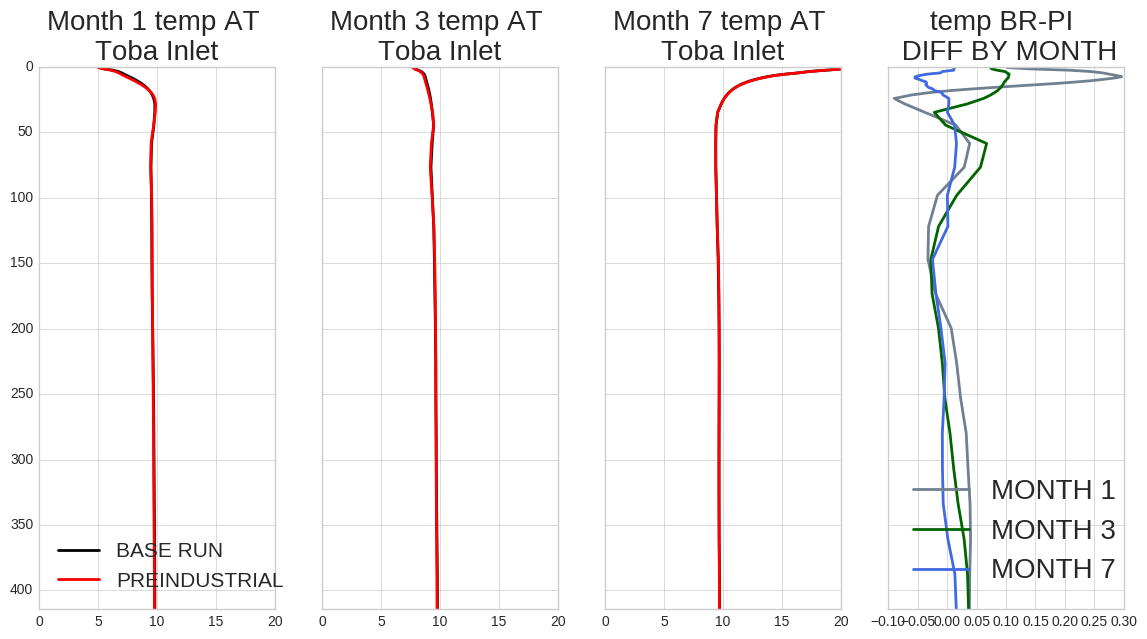

In [217]:
fname = 'temp_plots_stn_' + tstn + '_MON_' + str(mon1) + '-' + str(mon2) + '-' + str(mon3) +'.png'
xmin = 0
xmax = 20
ymin = 0
print(fname)

ncname = './pibr/' + tstn + '_stored_PI_BR_output.nc'
w = nc.Dataset(ncname)
mon_temp_BR_mean  = w['ncoutput']['mon_temp_BR_mean']
mon_temp_PI_mean = w['ncoutput']['mon_temp_PI_mean']

fig, (ax, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(14, 7), sharey=True)

ax.invert_yaxis()
ax.plot(mon_temp_BR_mean[mon1-1],prof_depth,linewidth = 2, linestyle='-',color = 'k', label = 'BASE RUN') 
ax.plot(mon_temp_PI_mean[mon1-1],prof_depth,linewidth = 2, linestyle='-',color = 'r', label = 'PREINDUSTRIAL') 
ax.set_xlim([xmin,xmax])
ax.set_ylim([ymax,ymin])
ax.set_title('Month ' + str(mon1) + ' temp AT \n'+cs.STATIONS[tstn]['fullname'], fontsize = 20)
ax.legend(fontsize = 15, loc = 'best')
mon1diff = mon_temp_BR_mean[mon1-1] - mon_temp_PI_mean[mon1-1]

ax2.plot(mon_temp_BR_mean[mon2-1],prof_depth,linewidth = 2, linestyle='-',color = 'k', label = 'BASE RUN') 
ax2.plot(mon_temp_PI_mean[mon2-1],prof_depth,linewidth = 2, linestyle='-',color = 'r', label = 'PREINDUSTRIAL') 
ax2.set_xlim([xmin,xmax])
ax2.set_ylim([ymax,ymin])
ax2.set_title('Month ' + str(mon2) + ' temp AT \n'+cs.STATIONS[tstn]['fullname'], fontsize = 20)

mon2diff = mon_temp_BR_mean[mon2-1] - mon_temp_PI_mean[mon2-1]

ax3.plot(mon_temp_BR_mean[mon3-1],prof_depth,linewidth = 2, linestyle='-',color = 'k', label = 'BASE RUN') 
ax3.plot(mon_temp_PI_mean[mon3-1],prof_depth,linewidth = 2, linestyle='-',color = 'r', label = 'PREINDUSTRIAL') 
ax3.set_xlim([xmin,xmax])
ax3.set_ylim([ymax,ymin])
ax3.set_title('Month ' + str(mon3) + ' temp AT \n'+cs.STATIONS[tstn]['fullname'], fontsize = 20)

mon3diff = mon_temp_BR_mean[mon3-1] - mon_temp_PI_mean[mon3-1]

ax4.plot(mon1diff,prof_depth,linewidth = 2, linestyle='-',color = 'slategrey',label = 'MONTH ' + str(mon1)) 
ax4.plot(mon2diff,prof_depth,linewidth = 2, linestyle='-',color = 'darkgreen',label = 'MONTH ' + str(mon2))
ax4.plot(mon3diff,prof_depth,linewidth = 2, linestyle='-',color = 'royalblue',label = 'MONTH ' + str(mon3))
ax4.legend(fontsize =20, loc = 'best')
ax4.set_title('temp BR-PI \n DIFF BY MONTH' , fontsize = 20)

fig.savefig(fname)

## Salinity plot

sal_plots_stn_TI_MON_1-3-7.png


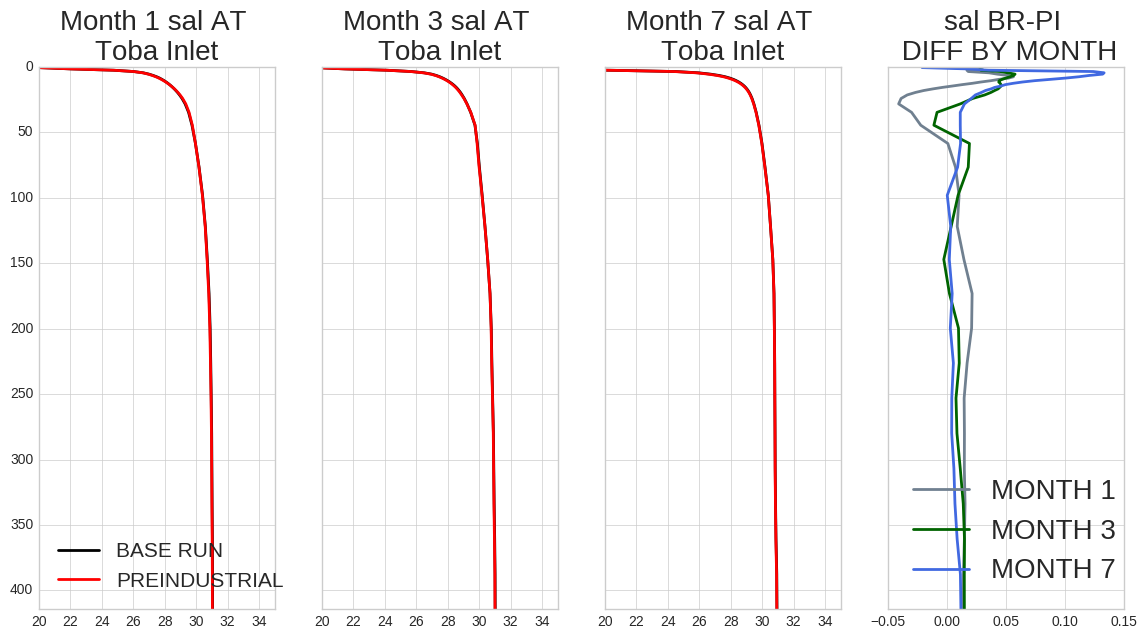

In [218]:
fname = 'sal_plots_stn_' + tstn + '_MON_' + str(mon1) + '-' + str(mon2) + '-' + str(mon3) +'.png'
xmin = 20
xmax = 35
ymin = 0
print(fname)

ncname = './pibr/' + tstn + '_stored_PI_BR_output.nc'
w = nc.Dataset(ncname)
mon_sal_BR_mean  = w['ncoutput']['mon_sal_BR_mean']
mon_sal_PI_mean = w['ncoutput']['mon_sal_PI_mean']

fig, (ax, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(14, 7), sharey=True)

ax.invert_yaxis()
ax.plot(mon_sal_BR_mean[mon1-1],prof_depth,linewidth = 2, linestyle='-',color = 'k', label = 'BASE RUN') 
ax.plot(mon_sal_PI_mean[mon1-1],prof_depth,linewidth = 2, linestyle='-',color = 'r', label = 'PREINDUSTRIAL') 
ax.set_xlim([xmin,xmax])
ax.set_ylim([ymax,ymin])
ax.set_title('Month ' + str(mon1) + ' sal AT \n'+cs.STATIONS[tstn]['fullname'], fontsize = 20)
ax.legend(fontsize = 15, loc = 'best')
mon1diff = mon_sal_BR_mean[mon1-1] - mon_sal_PI_mean[mon1-1]

ax2.plot(mon_sal_BR_mean[mon2-1],prof_depth,linewidth = 2, linestyle='-',color = 'k', label = 'BASE RUN') 
ax2.plot(mon_sal_PI_mean[mon2-1],prof_depth,linewidth = 2, linestyle='-',color = 'r', label = 'PREINDUSTRIAL') 
ax2.set_xlim([xmin,xmax])
ax2.set_ylim([ymax,ymin])
ax2.set_title('Month ' + str(mon2) + ' sal AT \n'+cs.STATIONS[tstn]['fullname'], fontsize = 20)

mon2diff = mon_sal_BR_mean[mon2-1] - mon_sal_PI_mean[mon2-1]

ax3.plot(mon_sal_BR_mean[mon3-1],prof_depth,linewidth = 2, linestyle='-',color = 'k', label = 'BASE RUN') 
ax3.plot(mon_sal_PI_mean[mon3-1],prof_depth,linewidth = 2, linestyle='-',color = 'r', label = 'PREINDUSTRIAL') 
ax3.set_xlim([xmin,xmax])
ax3.set_ylim([ymax,ymin])
ax3.set_title('Month ' + str(mon3) + ' sal AT \n'+cs.STATIONS[tstn]['fullname'], fontsize = 20)

mon3diff = mon_sal_BR_mean[mon3-1] - mon_sal_PI_mean[mon3-1]

ax4.plot(mon1diff,prof_depth,linewidth = 2, linestyle='-',color = 'slategrey',label = 'MONTH ' + str(mon1)) 
ax4.plot(mon2diff,prof_depth,linewidth = 2, linestyle='-',color = 'darkgreen',label = 'MONTH ' + str(mon2))
ax4.plot(mon3diff,prof_depth,linewidth = 2, linestyle='-',color = 'royalblue',label = 'MONTH ' + str(mon3))
ax4.legend(fontsize =20, loc = 'best')
ax4.set_title('sal BR-PI \n DIFF BY MONTH' , fontsize = 20)

fig.savefig(fname)